<a href="https://colab.research.google.com/github/siddahant/Cat_vs_dog-CNN/blob/main/cat_vs_dog_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
import random

In [2]:
url='http://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir=tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=url,extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [3]:
zip_dir_base=os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [4]:
base_dir=os.path.join(zip_dir_base,"cats_and_dogs_filtered")

train_path=os.path.join(base_dir,'train')
validation_path=os.path.join(base_dir,'validation')


In [5]:
train_data=[]
valid_data=[]
categories=['cats','dogs']

for category in categories:
  path_trr=os.path.join(train_path,category)
  path_valid=os.path.join(validation_path,category)

  for trr_img in os.listdir(path_trr):
    trr_lable=categories.index(category)
    img_path_trr=os.path.join(path_trr,trr_img)
    img_trr_arr=cv2.imread(img_path_trr)
    img_trr_arr=cv2.resize(img_trr_arr,(150,150))
    train_data.append([img_trr_arr,trr_lable])

  for val_img in os.listdir(path_valid):
    val_lable=categories.index(category)
    img_path_val=os.path.join(path_valid,val_img)
    img_val_arr=cv2.imread(img_path_val)
    img_val_arr=cv2.resize(img_val_arr,(150,150))
    valid_data.append([img_val_arr,val_lable])

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
def plotImage(img_arr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for image, ax in zip(img_arr,axes):
    ax.imshow(image)
  plt.tight_layout()
  plt.show()

In [8]:

data_gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [9]:
random.shuffle(train_data)
random.shuffle(valid_data)

In [10]:
x_train=[]
y_train=[]
x_valid=[]
y_valid=[]

for images,lable in train_data:
  x_train.append(images)
  y_train.append(lable)

for images1,lable1 in valid_data:
  x_valid.append(images1)
  y_valid.append(lable1)


In [11]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_valid=np.array(x_valid)
y_valid=np.array(y_valid)


(2000, 150, 150, 3)


Text(0.5, 1.0, 'dogs')

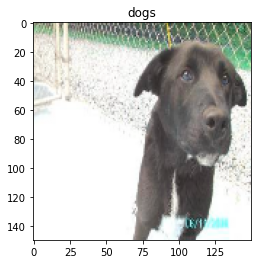

In [12]:
x_train=x_train/255
print(x_train.shape)
plt.imshow(x_train[0])
plt.title(categories[y_train[0]])

In [13]:

train_data_gen=data_gen.flow(x_train,y_train,shuffle=True,batch_size=50)
                                

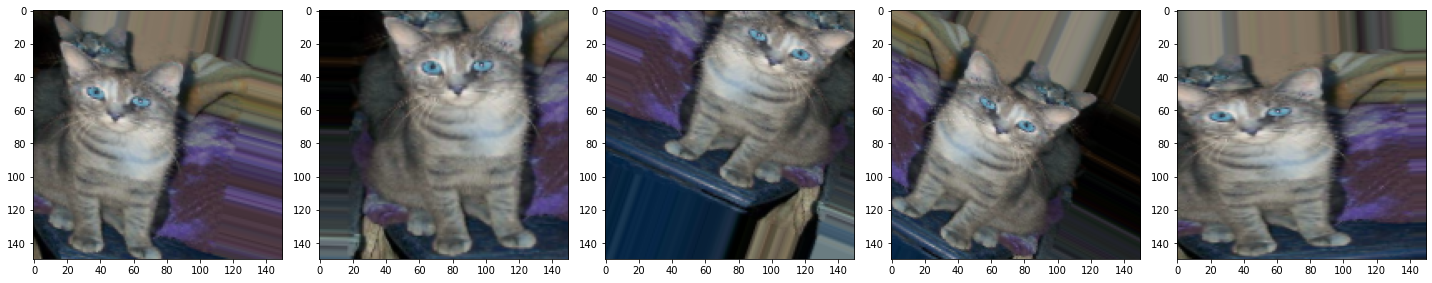

In [14]:
ag_image=[train_data_gen[0][0][0] for i in range (5)]
plotImage(ag_image)

In [15]:
x_valid=x_valid/255

In [26]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(32,(3,3),strides=(2,2),activation='relu', input_shape = (150,150,3)),
                           tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


                           tf.keras.layers.Conv2D(64,(3,3),strides=(2,2),activation='relu'),
                           tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

                           

                           tf.keras.layers.Conv2D(128,(3,3),strides=(2,2),activation='relu'),
                           tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                        
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(512,activation='relu'),
                          

                           tf.keras.layers.Dense(2,activation='softmax')                                    
])


In [27]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 74, 74, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [29]:
history = model.fit(train_data_gen,epochs=100,validation_data=(x_valid,y_valid),steps_per_epoch=40,validation_steps=20)

Epoch 1/100
40/40 [==============================] - 10s 230ms/step - loss: 0.6989 - accuracy: 0.5066 - val_loss: 0.6895 - val_accuracy: 0.5640
Epoch 2/100
40/40 [==============================] - 9s 226ms/step - loss: 0.6919 - accuracy: 0.5250 - val_loss: 0.6924 - val_accuracy: 0.5010
Epoch 3/100
40/40 [==============================] - 9s 227ms/step - loss: 0.6869 - accuracy: 0.5516 - val_loss: 0.6830 - val_accuracy: 0.5600
Epoch 4/100
40/40 [==============================] - 9s 225ms/step - loss: 0.6873 - accuracy: 0.5304 - val_loss: 0.6785 - val_accuracy: 0.5940
Epoch 5/100
40/40 [==============================] - 9s 224ms/step - loss: 0.6846 - accuracy: 0.5483 - val_loss: 0.6774 - val_accuracy: 0.6040
Epoch 6/100
40/40 [==============================] - 9s 225ms/step - loss: 0.6796 - accuracy: 0.5792 - val_loss: 0.6646 - val_accuracy: 0.6110
Epoch 7/100
40/40 [==============================] - 9s 227ms/step - loss: 0.6748 - accuracy: 0.5759 - val_loss: 0.6678 - val_accuracy: 0.568

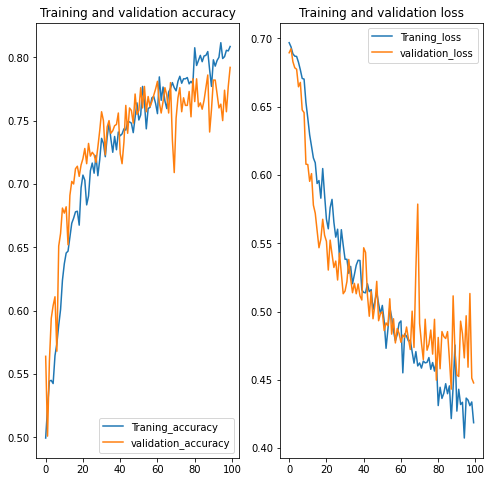

In [30]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(100)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Traning_accuracy')
plt.plot(epochs_range,val_acc,label='validation_accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Traning_loss')
plt.plot(epochs_range,val_loss,label='validation_loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.savefig('./foo.png')
plt.show()

